In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/FelAmore/Data-Science/main/tsunami.csv')

In [ ]:
# Checking missing values
data.isnull().sum()

Date         0
Latitude     0
Longitude    0
Magnitude    0
Depth        0
Location     0
dtype: int64

In [ ]:
data.head()

,Date,Latitude,Longitude,Magnitude,Depth,Location
0,2023-04-25 03:00:57,98.39,-0.93,7.3,84 Km,177 km BaratLaut KEP-MENTAWAI-SUMBAR(Warning T...
1,2023-04-25 03:00:57,98.39,-0.93,7.3,84 Km,177 km BaratLaut KEP-MENTAWAI-SUMBAR(Warning T...
2,2023-01-10 00:47:33,130.23,-7.37,7.5,130 Km,136 km BaratLaut MALUKUTENGGARABRT(Warning Tsu...
3,2023-01-10 00:47:34,130.18,-7.25,7.9,131 Km,148 km BaratLaut MALUKUTENGGARABRT(Warning Tsu...
4,2021-12-14 10:20:23,122.24,-7.59,7.4,10 Km,113 km BaratLaut LARANTUKA-NTT(Warning Tsunami...


In [ ]:
# Select features for X
features = ['Latitude', 'Longitude']

In [ ]:
X = data[features]
X

,Latitude,Longitude
0,98.39,-0.93
1,98.39,-0.93
2,130.23,-7.37
3,130.18,-7.25
4,122.24,-7.59
5,122.24,-7.59
6,122.24,-7.59
7,122.26,-7.59
8,126.39,1.67
9,126.39,1.67


In [ ]:
# Encode 'Magnitude'
magnitude_le = LabelEncoder()
data['Encoded_Magnitude'] = magnitude_le.fit_transform(data['Magnitude'])

# Print the mapping dictionaries for 'Magnitude'
magnitude_mapping_dict = dict(zip(data['Encoded_Magnitude'].unique(), magnitude_le.inverse_transform(data['Encoded_Magnitude'].unique())))
sorted_magnitude_mapping_dict = sorted(magnitude_mapping_dict.items(), key=lambda x: x[0])

print("Encoded_Magnitude Mapping:")
for key, value in sorted_magnitude_mapping_dict:
    print(f"{key} = {value}")

Encoded_Magnitude Mapping:
0 = 6.9
1 = 7.0
2 = 7.1
3 = 7.3
4 = 7.4
5 = 7.5
6 = 7.7
7 = 7.8
8 = 7.9


In [ ]:
Y = data['Encoded_Magnitude']
Y

0     3
1     3
2     5
3     8
4     4
5     4
6     4
7     5
8     2
9     2
10    2
11    2
12    4
13    4
14    4
15    1
16    1
17    2
18    0
19    0
20    6
21    1
22    1
23    1
24    1
25    1
26    7
27    7
28    7
29    7
Name: Encoded_Magnitude, dtype: int64

In [ ]:
print("Shape of x:", X.shape)
print("Shape of y:", Y.shape)

Shape of x: (30, 2)
Shape of y: (30,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=42)

print("The shape of x train:", X_train.shape)
print("The shape of x test:", X_test.shape)
print("The shape of y train:", Y_train.shape)
print("The shape of y test:", Y_test.shape)

The shape of x train: (12, 2)
The shape of x test: (18, 2)
The shape of y train: (12,)
The shape of y test: (18,)


In [ ]:
# Creating a Predictive model using SVR (Support Vector Regression)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6666666666666666


In [ ]:
# Creating and displaying the confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_pred_svm)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[0 0 0 0]
 [1 1 0 0]
 [1 0 2 0]
 [0 0 0 1]]


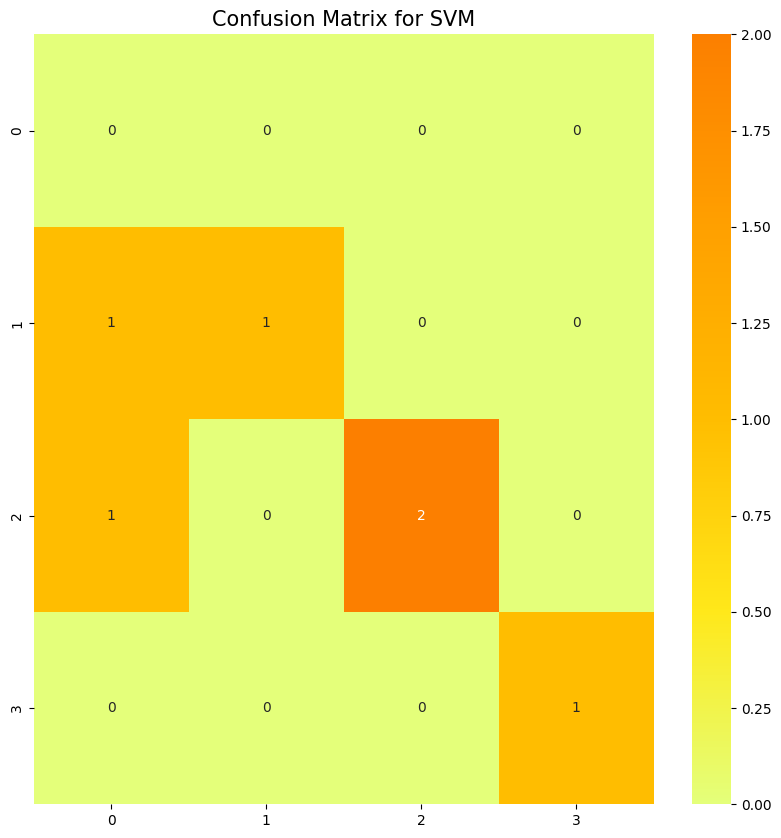

In [ ]:
# Evaluating Model Performance by using confusion matrix
plt.rcParams['figure.figsize'] = [10,10]
confusion_mat = confusion_matrix(Y_test, Y_pred_svm)
sns.heatmap(confusion_mat, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for SVM', fontsize=15)
plt.show()

In [ ]:
# Calculate precision, recall, and F1-score with a classification report
report = classification_report(Y_test, Y_pred_svm, zero_division=1)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.50      0.67         2
           2       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         1

    accuracy                           0.67         6
   macro avg       0.75      0.79      0.62         6
weighted avg       1.00      0.67      0.79         6



In [72]:
data.head()

,Date,Latitude,Longitude,Magnitude,Depth,Location,Encoded_Location,Encoded_Magnitude
0,2023-04-25 03:00:57,98.39,-0.93,7.3,84 Km,177 km BaratLaut KEP-MENTAWAI-SUMBAR(Warning T...,3,3
1,2023-04-25 03:00:57,98.39,-0.93,7.3,84 Km,177 km BaratLaut KEP-MENTAWAI-SUMBAR(Warning T...,3,3
2,2023-01-10 00:47:33,130.23,-7.37,7.5,130 Km,136 km BaratLaut MALUKUTENGGARABRT(Warning Tsu...,5,5
3,2023-01-10 00:47:34,130.18,-7.25,7.9,131 Km,148 km BaratLaut MALUKUTENGGARABRT(Warning Tsu...,8,8
4,2021-12-14 10:20:23,122.24,-7.59,7.4,10 Km,113 km BaratLaut LARANTUKA-NTT(Warning Tsunami...,4,4


In [73]:
# Testing the model
features = pd.DataFrame(np.array([[122.24, -7.59]]), columns=['Latitude', 'Longitude'])
prediction = svm_model.predict(features)
predicted_labels = magnitude_le.inverse_transform(prediction)
formatted_labels = [f"{value:.1f}" for value in predicted_labels]
print("The predicted magnitude is", formatted_labels)

The predicted magnitude is ['7.4']
